In [1]:
working_dir = "/data/projects/dschaub/ANCA-GN_transcriptomics"
data_dir = "data/single-cell/ustekinumab/prefiltering_objects"
save_dir = data_dir

In [2]:
setwd(working_dir)

library(Seurat)
library(dplyr)
#library(tidyverse)
library(here)
#library(readxl)
#library(future)
#library(Matrix)
library(Signac)
library(ggplot2)
#library(sctransform)
library("xlsx")
library(future)
#plan("multiprocess", workers = 20)
options(future.globals.maxSize = 20 * 1000 * 1024^2)#20GB
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
RhpcBLASctl::blas_set_num_threads(1)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


here() starts at /data/projects/dschaub/ANCA-GN_transcriptomics



In [3]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /usr/lib/x86_64-linux-gnu/openblas-openmp/libopenblasp-r0.3.8.so

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=en_US.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=en_US.UTF-8       LC_MESSAGES=C                
 [7] LC_PAPER=en_US.UTF-8          LC_NAME=en_US.UTF-8          
 [9] LC_ADDRESS=en_US.UTF-8        LC_TELEPHONE=en_US.UTF-8     
[11] LC_MEASUREMENT=en_US.UTF-8    LC_IDENTIFICATION=en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] future_1.22.1      xlsx_0.6.5         ggplot2_3.3.5      Signac_1.4.0      
[5] here_1.0.1         dplyr_1.0.7        SeuratObject_4.0.2 Seurat_4.0.4      

loaded via a namespace (and not attached):
  [1] uuid_0.1-4             fastmatch_1.1-3        plyr_1.8.6    

In [4]:
samples_ID="T003"

In [5]:
path = file.path(data_dir, paste0(samples_ID, ".rds"))
print(path)
seu<-readRDS(path)
seu

[1] "data/single-cell/ustekinumab/prefiltering_objects/T003.rds"


An object of class Seurat 
36807 features across 13746 samples within 2 assays 
Active assay: RNA (36601 features, 0 variable features)
 1 other assay present: CITE

In [6]:
DefaultAssay(object = seu) <- "RNA"

In [7]:
seu <- NormalizeData(object = seu,
                     normalization.method = "LogNormalize",
                     scale.factor = 10000)

In [8]:
seu<-FindVariableFeatures(seu, 
        selection.method = "vst", nfeatures = 2000, verbose = FALSE)

In [9]:
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(seu), 10)
top10

[1] "IGLV3-19" "TRBV10-3" "GNLY"     "TRBV12-3" "TRBV7-2"  "TRBV4-2" 
 [7] "TRBV12-4" "TRBV6-6"  "TRBV11-2" "CCL4"

In [10]:
#DefaultAssay(object = seu) <- "RNA"
seu <- ScaleData(seu,features = rownames(seu))

Centering and scaling data matrix



In [11]:
seu <- RunPCA(object = seu, features = VariableFeatures(object = seu),
              verbose = F)

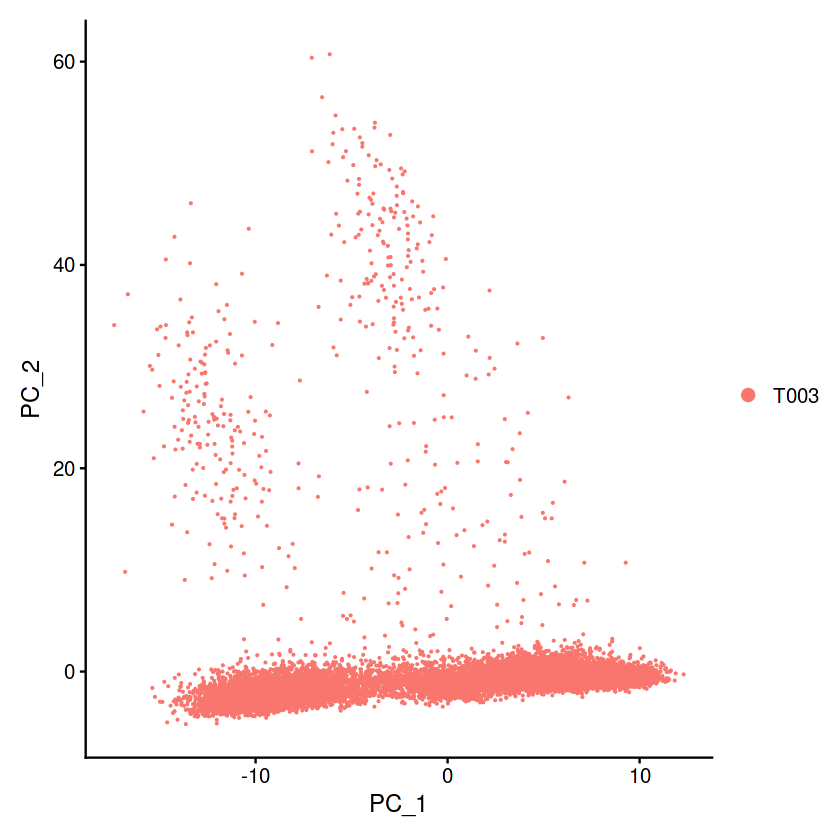

In [12]:
DimPlot(object = seu, pt.size = 0.1,reduction = 'pca')

In [13]:
# Examine and visualize PCA results 
print(seu[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  RPLP1, RPL13, RPL39, RPL18A, TPT1 
Negative:  ZEB2, AOAH, CCL5, NKG7, KLRG1 
PC_ 2 
Positive:  IGHV3-21, MS4A1, CD79A, BANK1, NIBAN3 
Negative:  TNFAIP3, IL7R, KLRG1, PRF1, IL32 
PC_ 3 
Positive:  TXNIP, GIMAP7, S1PR1, GIMAP4, MYC 
Negative:  JUNB, NR4A2, ZNF331, RGS1, FOS 
PC_ 4 
Positive:  LEF1, SERINC5, MAL, TNFRSF4, AP3M2 
Negative:  GZMA, CST7, CCL5, GZMK, CD8A 
PC_ 5 
Positive:  FOXP3, RTKN2, IKZF2, TIGIT, GBP5 
Negative:  ANXA1, FOS, CD69, IL7R, FOSB 


In [14]:
#seu <- RunTSNE(object = seu, dims = 1:30)
seu <- RunUMAP(object = seu, dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:18:11 UMAP embedding parameters a = 0.9922 b = 1.112

13:18:11 Read 13746 rows and found 30 numeric columns

13:18:11 Using Annoy for neighbor search, n_neighbors = 30

13:18:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:18:13 Writing NN index file to temp file /tmp/RtmpKqyacx/filefd56e239b5f6e

13:18:13 Searching Annoy index using 1 thread, search_k = 3000

13:18:17 Annoy recall = 100%

13:18:18 Commencing smooth kNN distance calibration using 1 thread

13:18:19 Initializing f

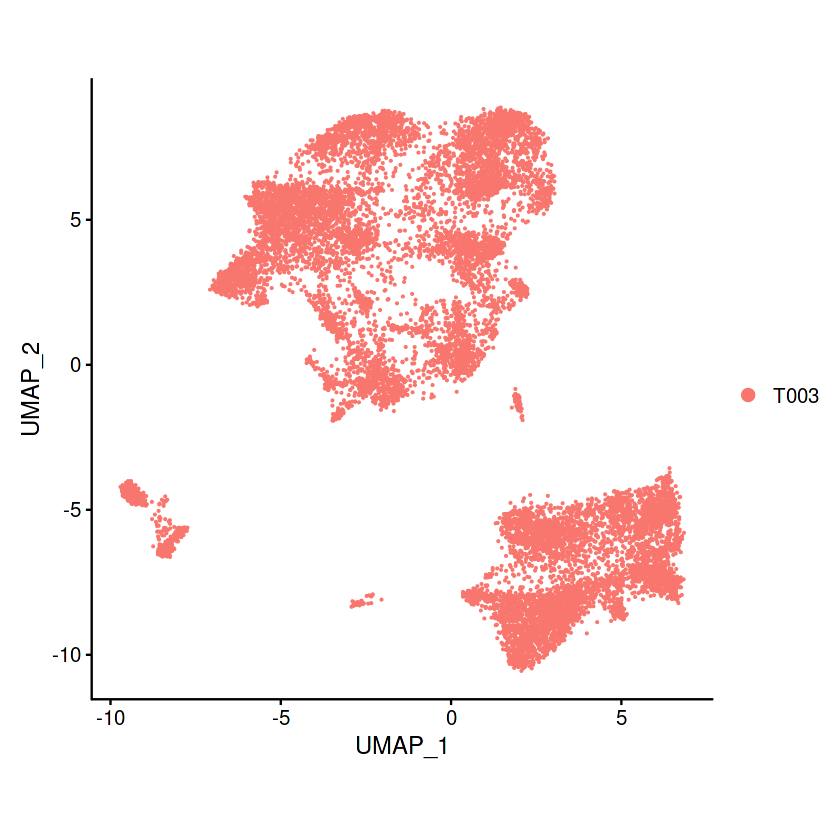

In [15]:
#DimPlot(object = seu,
#        reduction = 'tsne',label = F, 
#        pt.size = 0.1)+ theme(aspect.ratio=1)
DimPlot(object = seu,
        reduction = 'umap',label = F, 
        pt.size = 0.1)+ theme(aspect.ratio=1)

In [16]:
seu <- FindNeighbors(object = seu, dims = 1:30)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13746
Number of edges: 544538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9340
Number of communities: 14
Elapsed time: 3 seconds



   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
2141 1962 1883 1875 1101 1066 1028  918  726  550  212  189   50   45 

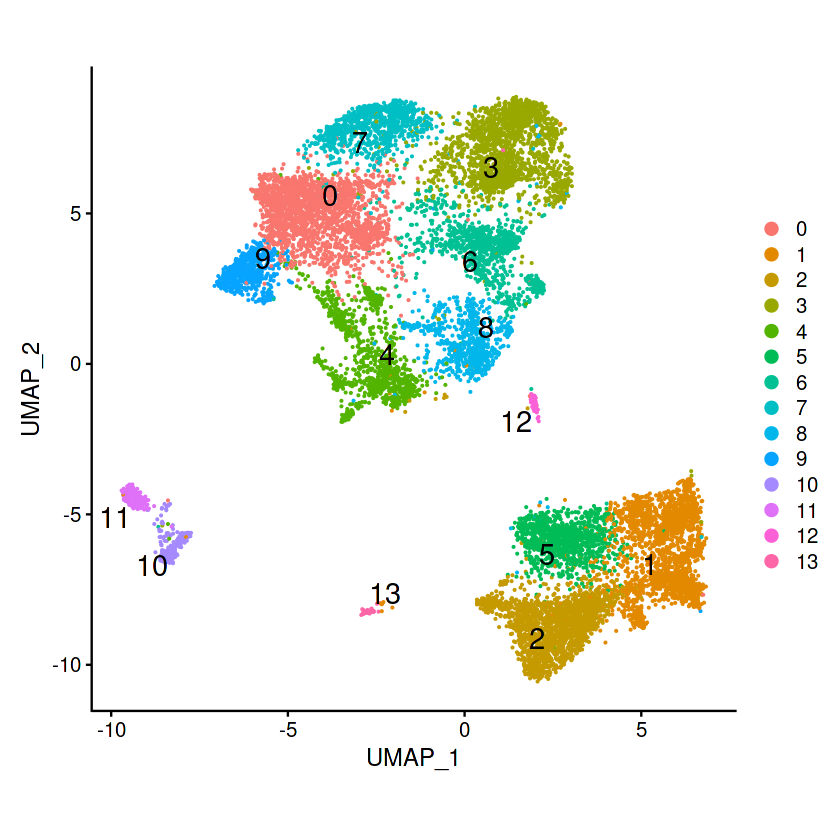

In [17]:
seu <- FindClusters(object = seu, resolution = 0.3)
table(Idents(seu))
#DimPlot(object = seu, reduction = 'tsne',label = TRUE, 
#        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)
DimPlot(object = seu, reduction = 'umap',label = TRUE, 
        pt.size = 0.1,label.size = 6, repel = T) + theme(aspect.ratio=1)

In [18]:
Idents(seu) <- seu@meta.data$seurat_clusters
ident_use = seu@meta.data$seurat_clusters

In [19]:
# nCells in total 
paste0(ncol(GetAssayData(object = seu, slot = "scale.data"))," cells in total")
# show percentage of nCells from each cluster 
cluster_nCell<-as.data.frame(table(ident_use))
colnames(cluster_nCell)<- c("cluster","nCells")
cluster_nCell$percent <-  round((cluster_nCell$nCells / sum(cluster_nCell$nCells)*100),2)
cluster_nCell

[1] "13746 cells in total"

cluster,nCells,percent
<fct>,<int>,<dbl>
0,2141,15.58
1,1962,14.27
2,1883,13.70
3,1875,13.64
4,1101,8.01
5,1066,7.75
6,1028,7.48
7,918,6.68
8,726,5.28


In [20]:
# marker_qc<-c("nFeature_RNA","nCount_RNA","frac.mito","frac.ribo","CD3_count")
# for (n in marker_qc){
#     print(VlnPlot(object = seu, features = n,
#                   #group.by = "sample",
#                   #x.lab.rot=T, 
#                   #size.x.use = 5,
#                   pt.size = 0.01
#                        )+NoLegend()
#     )
#         print(VlnPlot(object = seu, features = n,
#                   #group.by = "sample",
#                   #x.lab.rot=T, 
#                   #size.x.use = 5,
#                   pt.size = 0
#                        )+NoLegend()
#     )
#     }

In [21]:
# find markers for every cluster compared to all remaining cells, report only the positive ones
seu.markers <- FindAllMarkers(object = seu, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.5)
#logfc.threshold=0.25 (default) instead of old version thresh.use=0.25
head(seu.markers)
dim(seu.markers)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
AQP3,0,1.1483082,0.835,0.354,0,0,AQP3
LTB,0,1.1342743,0.996,0.765,0,0,LTB
S100A11,0,1.0158329,0.947,0.495,0,0,S100A11
TCF7,0,0.9351273,0.920,0.499,0,0,TCF7
CISH,0,0.9172240,0.567,0.184,0,0,CISH
TMSB10,0,0.9001386,1.000,0.970,0,0,TMSB10


[1] 2653    7

In [22]:
top3 <- seu.markers %>% group_by(cluster) %>% top_n(3, avg_log2FC)
top5 <- seu.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)
top10 <- seu.markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)

In [57]:
top10

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,1.1483082,0.835,0.354,0.000000e+00,0,AQP3
0.000000e+00,1.1342743,0.996,0.765,0.000000e+00,0,LTB
0.000000e+00,1.0158329,0.947,0.495,0.000000e+00,0,S100A11
0.000000e+00,0.9351273,0.920,0.499,0.000000e+00,0,TCF7
0.000000e+00,0.9172240,0.567,0.184,0.000000e+00,0,CISH
0.000000e+00,0.9001386,1.000,0.970,0.000000e+00,0,TMSB10
0.000000e+00,0.8954415,0.611,0.170,0.000000e+00,0,MYC
0.000000e+00,0.8820678,0.824,0.391,0.000000e+00,0,NOSIP
1.019288e-224,0.8730663,0.552,0.215,3.730696e-220,0,KLRB1


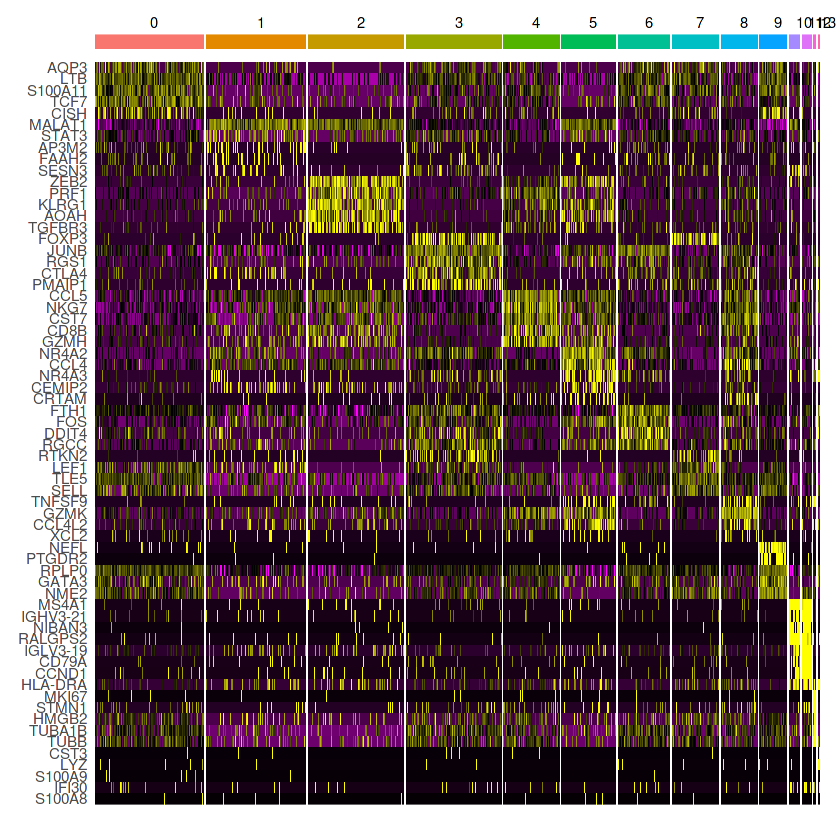

In [24]:
plt1<-DoHeatmap(object = seu, features = top5$gene,
         size = 3, angle=0)+NoLegend()
plt1

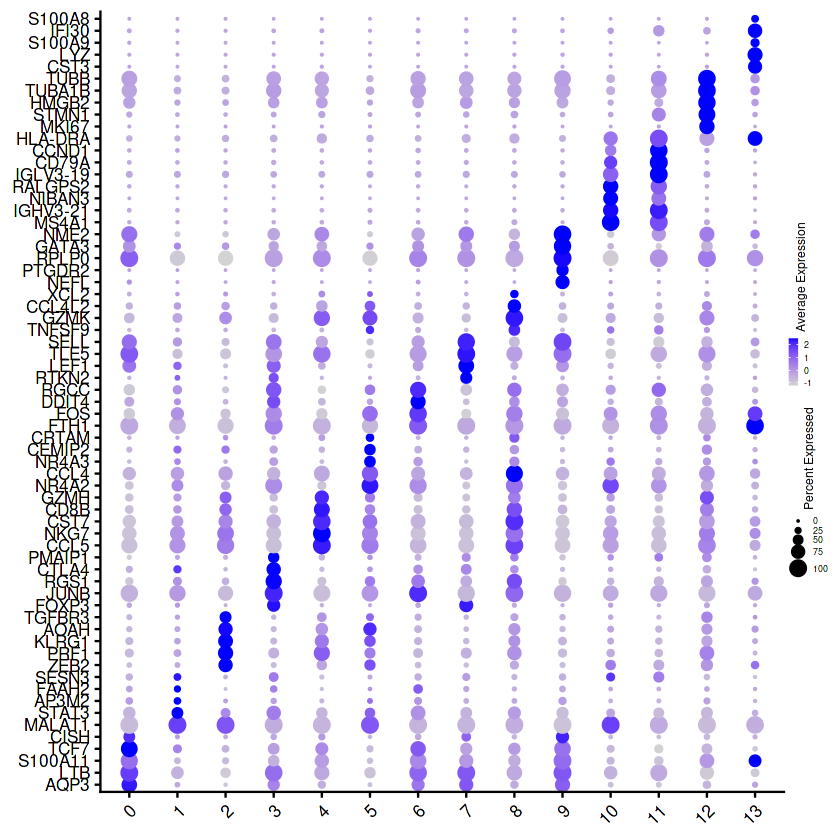

In [25]:
plt1<-DotPlot(seu, features = unique(top5$gene),
              dot.scale = 4
              #scale.by = "size"
             ) + coord_flip()+
theme(#strip.background = element_blank(),
    axis.title = element_blank(),
    axis.text.x = element_text(size = 10,angle = 45,hjust = 1),
    axis.text.y = element_text(size = 10),
     legend.position = "right",
     #legend.spacing = unit(0, "mm"),
     legend.direction = "vertical",
        legend.text = element_text(size=5),
        legend.key.width = unit(2, "mm"),
        legend.key.height = unit(2, "mm"),
        legend.box.spacing = unit(1, "mm"),
        legend.margin = margin(2),
        legend.title = element_text(size = 7,angle = 90)
)
plt1

In [26]:
DefaultAssay(seu)<-"RNA"

In [27]:
# Search for known marker genes in seu
leukos <- c("PTPRC") 
Tcells <- c("CD3G","CD3D","CD3E")
CD4<-c("CD4")
CD8 <- c("CD8A", "PRF1", "GZMB")
Memory<-c("CCR7","SELL","KLF2","CD69","S1PR1")
NK <- c("KLRC1")
Th1 <- c("TBX21", "IFNG", "LTA") 
Th2 <- c("GATA3", "IL4", "IL5", "IL13") 
Th17 <- c("RORC","IL17A","IL17F", "IL23R","CCR6") 
Tregs <- c("FOXP3", "IL2RA", "CTLA4")
Tr1<-c("IL10","ITGA2","LAG3","HAVCR2")#,"Ahr","Irf4","Prdm1","Maf")
Tgd<- c("TRDC","TCRG")
Prolif<-c("STMN1","MKI67")
#Tgd_Scart<-c("SCART2")
#T_APC<-c("C1QA","C1QB")
#others<-c("ZCCHC12","KLRC3","VCAM1")

known_markers<-list(
leukos,
Tcells,
CD4,
CD8,
Memory,
NK,
Th1,
Th2,
Th17,
Tregs,
Tr1,
Tgd,
Prolif
#Tgd_Scart,
#T_APC,
#others   
)
known_markers

marker_gene_list<-known_markers
length(unlist(marker_gene_list))
marker_gene_list_expressed <- intersect(unlist(marker_gene_list), rownames(GetAssayData(seu)))
length(marker_gene_list_expressed)
setdiff(unlist(marker_gene_list),marker_gene_list_expressed)

[[1]]
[1] "PTPRC"

[[2]]
[1] "CD3G" "CD3D" "CD3E"

[[3]]
[1] "CD4"

[[4]]
[1] "CD8A" "PRF1" "GZMB"

[[5]]
[1] "CCR7"  "SELL"  "KLF2"  "CD69"  "S1PR1"

[[6]]
[1] "KLRC1"

[[7]]
[1] "TBX21" "IFNG"  "LTA"  

[[8]]
[1] "GATA3" "IL4"   "IL5"   "IL13" 

[[9]]
[1] "RORC"  "IL17A" "IL17F" "IL23R" "CCR6" 

[[10]]
[1] "FOXP3" "IL2RA" "CTLA4"

[[11]]
[1] "IL10"   "ITGA2"  "LAG3"   "HAVCR2"

[[12]]
[1] "TRDC" "TCRG"

[[13]]
[1] "STMN1" "MKI67"

[1] 37

[1] 36

[1] "TCRG"

In [28]:
genes_to_plot<- marker_gene_list_expressed
length(genes_to_plot)

[1] 36

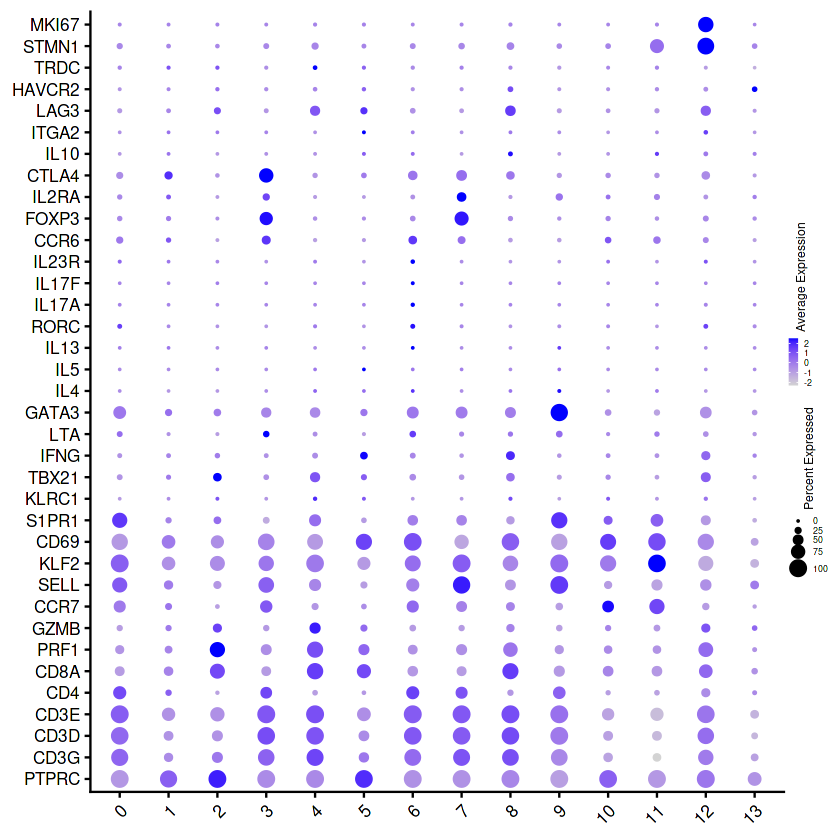

In [29]:
plt1<-DotPlot(seu, features = genes_to_plot,
              dot.scale = 4
              #scale.by = "size"
             ) + coord_flip()+
theme(#strip.background = element_blank(),
    axis.title = element_blank(),
    axis.text.x = element_text(size = 10,angle = 45,hjust = 1),
    axis.text.y = element_text(size = 10),
     legend.position = "right",
     #legend.spacing = unit(0, "mm"),
     legend.direction = "vertical",
        legend.text = element_text(size=5),
        legend.key.width = unit(2, "mm"),
        legend.key.height = unit(2, "mm"),
        legend.box.spacing = unit(1, "mm"),
        legend.margin = margin(2),
        legend.title = element_text(size = 7,angle = 90)
)
plt1

In [30]:
markers_to_plot<-c(
'CD4',
'CD8A',
'PRF1',
'GZMB',
'CCR7',
'SELL',
'KLF2',
'CD69',
'S1PR1',
'KLRC1',
'TBX21',
'IFNG',
'CXCR3',
'CXCR6',
'LTA',
'IL22',
'CCL20',    
'RORC',
'CSF2',   
'IL17A',
'IL17F',
'IL23R',
'CCR6',
'FOXP3',
'IL2RA',
'CTLA4',
'IL10',
'LAG3',
'HAVCR2',
'TRDC',
'CD79A',
'STMN1',
'MKI67')

In [31]:
# for (n in markers_to_plot){
#     print(VlnPlot(object = seu, features = n,
#                   #group.by = "sample",
#                   #x.lab.rot=T, 
#                   #size.x.use = 5,
#                   pt.size = 0.01
#                        )+NoLegend()
#     )
#     print(FeaturePlot(object = seu,features = n,
#                   cols = c("lightgrey", "blue"),
#                       order = T,
#                       reduction = "umap",
#                 pt.size=1
#                        ))    

#     }

In [32]:
DefaultAssay(object = seu) <- "CITE"

In [33]:
seu

An object of class Seurat 
36807 features across 13746 samples within 2 assays 
Active assay: CITE (206 features, 0 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [34]:
##CITE
seu <- NormalizeData(object = seu, assay = "CITE", 
                     normalization.method = "LogNormalize",
                     scale.factor = 10)
seu <- ScaleData(seu, assay = "CITE", display.progress = T)

Warning message:
“The following arguments are not used: display.progress”
Suggested parameter: verbose instead of display.progress


Centering and scaling data matrix



In [35]:
CITE_gene<-
c(
"cite_HashK",
"cite_HashB",
"cite_CD80",
"cite_CD86",
"cite_PDL1",
"cite_PDL2",
"cite_ICOSL",
"cite_HVEM",
"cite_OX40L",
"cite_CD137L",
"cite_PVR",
"cite_Nectin2",
"cite_CD47",
"cite_CD70",
"cite_CD30",
"cite_CD48",
"cite_CD40",
"cite_CD154",
"cite_CD52",
"cite_CD3",
"cite_CD8",
"cite_CD56",
"cite_CD19",
"cite_CD33",
"cite_CD11c",
"cite_CD34",
"cite_BCMA",
"cite_HLAABC",
"cite_c.kit",
"cite_CD10",
"cite_CD45RA",
"cite_CD123",
"cite_CD7",
"cite_CD105",
"cite_EPCR",
"cite_CD49f",
"cite_CCR4",
"cite_CD4",
"cite_CD44",
"cite_CD14",
"cite_CD16",
"cite_CD25",
"cite_CD45RO",
"cite_CD279",
"cite_TIGIT",
"cite_mIgG1k",
"cite_mIgG2ak",
"cite_mIgG2bk",
"cite_rIgG2b",
"cite_CD20",
"cite_NKp46",
"cite_CRTH2",
"cite_CD45R",
"cite_EpCAM",
"cite_CD31",
"cite_Podoplanin",
"cite_PDGFRA",
"cite_PDGFRB",
"cite_EGFR",
"cite_CD146",
"cite_E.Cadherin",
"cite_IgM",
"cite_CD5",
"cite_TCRgd",
"cite_CXCR3",
"cite_CCR5",
"cite_CD32",
"cite_CCR6",
"cite_CXCR5",
"cite_CD103",
"cite_CD69",
"cite_CD62L",
"cite_CCR7",
"cite_CD161",
"cite_CTLA4",
"cite_LAG3",
"cite_KLRG1",
"cite_CD27",
"cite_LAMP1",
"cite_Fas",
"cite_OX40",
"cite_HLADR",
"cite_CD1c",
"cite_CD11b",
"cite_CD64",
"cite_Thrombomodulin",
"cite_CD1d",
"cite_NKG2D",
"cite_CD66b",
"cite_CD35",
"cite_CD57",
"cite_Tim3",
"cite_BTLA",
"cite_ICOS",
"cite_LFA3",
"cite_TACTILE",
"cite_CD39",
"cite_FasL",
"cite_CX3CR1",
"cite_CD24",
"cite_CD21",
"cite_CD11a",
"cite_CD79b",
"cite_CD66ace",
"cite_CD244",
"cite_CD235ab",
"cite_MMR",
"cite_CD169",
"cite_CLEC9A",
"cite_XCR1",
"cite_Notch1",
"cite_ITGB7",
"cite_BAFFR",
"cite_CD42b",
"cite_CD54",
"cite_CD62P",
"cite_IFNGR1",
"cite_TCRab",
"cite_Notch3",
"cite_rIgG1k",
"cite_rIgG2ak",
"cite_IgG",
"cite_CD106",
"cite_IL2R",
"cite_TACI",
"cite_CD62E",
"cite_FceRIa",
"cite_CD41",
"cite_CD137",
"cite_TRANCE",
"cite_CD163",
"cite_CD83",
"cite_GITR",
"cite_IL4R",
"cite_CD13",
"cite_CXCR4",
"cite_CD2",
"cite_DNAM1",
"cite_CD29",
"cite_BDCA2",
"cite_CD49b",
"cite_TAPA1",
"cite_CD98",
"cite_IgGFc",
"cite_IgD",
"cite_CD18",
"cite_CD28",
"cite_TSLPR",
"cite_CD38",
"cite_IL7R",
"cite_CD45",
"cite_CD22",
"cite_CD71",
"cite_B7H4",
"cite_CD26",
"cite_CD204",
"cite_VECadherin",
"cite_CD1a",
"cite_Neuropilin1",
"cite_CD36",
"cite_KIR2DL1",
"cite_NCadherin",
"cite_CD207",
"cite_CD49a",
"cite_CD49d",
"cite_CD73",
"cite_TCRVa7.2",
"cite_TCRVd2",
"cite_TCRVg9",
"cite_TCRVa24Ja18",
"cite_LAIR1",
"cite_LOX1",
"cite_KIR2DL2",
"cite_DC.SIGN",
"cite_KIR3DL1",
"cite_KIR2DL5",
"cite_NKp30",
"cite_NKp44",
"cite_FcRL4",
"cite_FcRL5",
"cite_CRACC",
"cite_CD99",
"cite_CLEC12A",
"cite_BAFF",
"cite_NTB.A",
"cite_CD94",
"cite_SLAM",
"cite_Ig.lightK",
"cite_Galectin3",
"cite_ILT2",
"cite_CD23",
"cite_Iglambda",
"cite_HLA.A2",
"cite_LRRC32",
"cite_Siglec7",
"cite_TCRVb13.1",
"cite_GPR56",
"cite_HLA.E",
"cite_CD82",
"cite_BB27",
"cite_IL21R",
"cite_C5aR",
"cite_Podocalyxin",
"cite_CD224",
"cite_LIGHT",
"cite_TRAMP")

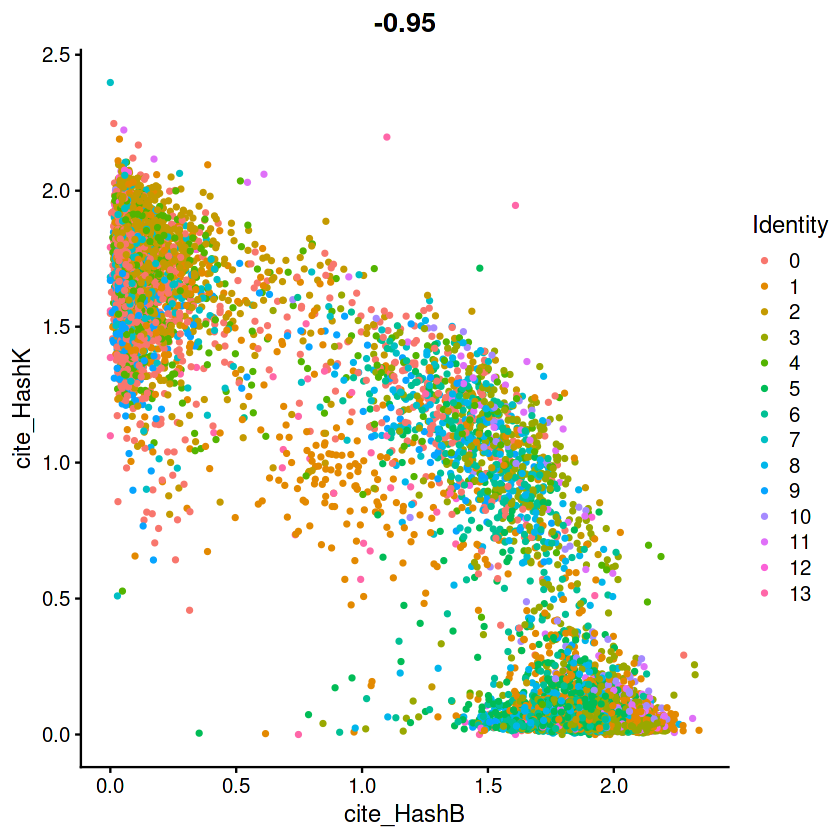

In [36]:
FeatureScatter(seu, feature1 = "cite_HashB", feature2 = "cite_HashK")
#FeatureScatter(seu, feature1 = "cite_HashB", feature2 = "cite_HashK",
#              slot = "counts")

In [37]:
# for (n in CITE_gene){
#     print(FeaturePlot(object = seu,features = n,
#                   cols = c("lightgrey", "blue"),
#                       order = T,
#                       slot = "data",
#                       #min.cutoff = "q20", max.cutoff = "q80",
#                       reduction = "umap",
#                 pt.size=1
#                        ))   
#       print(VlnPlot(object = seu, features = n,
#                  #group.by = "sample",
#                  #x.lab.rot=T, 
#                  #size.x.use = 5,
#                  pt.size = 0.01
#                       )+NoLegend()
#    )
#     #print(RidgePlot(seu, 
#     #          features = n))

#     }

In [38]:
dim(seu@assays$CITE)

[1]   206 13746

In [39]:
seu_1<-seu

In [40]:
hto_mt<-as.matrix(
    seu@assays$CITE@counts[c("HashK","HashB"),])
rownames(hto_mt)<-c("HashB","HashK")
seu_1[["HTO"]] <- CreateAssayObject(counts = hto_mt)

In [41]:
dim(seu_1@assays$HTO@data)

[1]     2 13746

In [42]:
as.matrix(seu_1@assays$HTO@data)

,AAACCTGAGAAACCAT-1,AAACCTGAGAAAGTGG-1,AAACCTGAGACAAAGG-1,AAACCTGAGCCCGAAA-1,AAACCTGAGCTGATAA-1,AAACCTGAGGCCCTTG-1,AAACCTGAGGCGTACA-1,AAACCTGAGTAAGTAC-1,AAACCTGAGTGTACCT-1,AAACCTGCAAAGTCAA-1,AAACCTGCAACACGCC-1,AAACCTGCAAGTCTAC-1,AAACCTGCAATAGAGT-1,AAACCTGCACCCATGG-1,AAACCTGCACCGAAAG-1,AAACCTGCAGCCTTTC-1,AAACCTGCAGGCAGTA-1,AAACCTGCATACGCCG-1,AAACCTGCATCTGGTA-1,AAACCTGCATTGTGCA-1,AAACCTGGTCGAGATG-1,AAACCTGGTCTAAAGA-1,AAACCTGGTGGAAAGA-1,AAACCTGGTGGCTCCA-1,AAACCTGGTTACGTCA-1,AAACCTGGTTATGCGT-1,AAACCTGGTTCACGGC-1,AAACCTGTCATGCTCC-1,AAACCTGTCCGTCATC-1,AAACCTGTCCTCCTAG-1,AAACCTGTCGGTCCGA-1,AAACCTGTCTTGTATC-1,AAACGGGAGATGAGAG-1,AAACGGGAGCGATAGC-1,AAACGGGAGCGCTCCA-1,AAACGGGAGGCTACGA-1,AAACGGGAGGGTGTGT-1,AAACGGGAGGTGATAT-1,AAACGGGCAAGGTTTC-1,AAACGGGCAATGGAAT-1,AAACGGGCAGCTCCGA-1,AAACGGGGTATCTGCA-1,AAACGGGGTCGCATAT-1,AAACGGGGTCTACCTC-1,AAACGGGGTCTTGTCC-1,AAACGGGGTGCACGAA-1,AAACGGGGTGTTCTTT-1,AAACGGGGTTTGGCGC-1,AAACGGGGTTTGTGTG-1,AAACGGGGTTTGTTGG-1,AAACGGGTCACTCCTG-1,AAACGGGTCCTAGGGC-1,AAACGGGTCGTCCGTT-1,AAACGGGTCTCTAAGG-1,AAACGGGTCTTACCTA-1,AAAGATGAGACGCAAC-1,AAAGATGAGCTACCTA-1,AAAGATGAGGACTGGT-1,AAAGATGAGGTGCAAC-1,AAAGATGAGTACGATA-1,AAAGATGAGTCAATAG-1,AAAGATGCAACGATCT-1,AAAGATGCAAGGTTTC-1,AAAGATGCACGAGGTA-1,AAAGATGCACTCGACG-1,AAAGATGCAGACGTAG-1,AAAGATGCAGCTTAAC-1,AAAGATGCAGGTGGAT-1,AAAGATGCATATGGTC-1,AAAGATGCATCCGCGA-1,AAAGATGCATCCGGGT-1,AAAGATGCATGCAACT-1,AAAGATGCATGCATGT-1,AAAGATGGTATAGGTA-1,AAAGATGGTCAATACC-1,AAAGATGGTGTGAATA-1,AAAGATGGTGTTGAGG-1,AAAGATGGTGTTTGGT-1,AAAGATGGTTAGGGTG-1,AAAGATGTCATCGGAT-1,AAAGATGTCCAAGTAC-1,AAAGATGTCCTTGACC-1,AAAGATGTCGCCTGAG-1,AAAGATGTCGTCACGG-1,AAAGATGTCGTTGACA-1,AAAGATGTCTTGTATC-1,AAAGCAAAGAAGAAGC-1,AAAGCAAAGAGCTGGT-1,AAAGCAAAGGCTCATT-1,AAAGCAAAGTACGCCC-1,AAAGCAAAGTGGGCTA-1,AAAGCAAAGTGTACCT-1,AAAGCAACATGGAATA-1,AAAGCAAGTAAGAGGA-1,AAAGCAAGTACATCCA-1,AAAGCAAGTCACAAGG-1,AAAGCAAGTCAGATAA-1,AAAGCAAGTCGAACAG-1,AAAGCAAGTCGGGTCT-1,AAAGCAAGTCTAGCGC-1,⋯,TTTCCTCGTCATCCCT-1,TTTCCTCGTCCAGTTA-1,TTTCCTCGTCGAACAG-1,TTTCCTCGTCGCATCG-1,TTTCCTCGTCTCCCTA-1,TTTCCTCGTGTGGTTT-1,TTTCCTCTCCTACAGA-1,TTTCCTCTCGGATGTT-1,TTTCCTCTCTGGGCCA-1,TTTCCTCTCTTTAGTC-1,TTTGCGCAGACGCAAC-1,TTTGCGCAGACTCGGA-1,TTTGCGCAGATAGGAG-1,TTTGCGCAGCCAGTTT-1,TTTGCGCAGTCATGCT-1,TTTGCGCAGTGAATTG-1,TTTGCGCAGTGCAAGC-1,TTTGCGCAGTGTACGG-1,TTTGCGCCAAAGGCGT-1,TTTGCGCCAATGGAAT-1,TTTGCGCCACAACGCC-1,TTTGCGCCACCATGTA-1,TTTGCGCCAGACGTAG-1,TTTGCGCCAGCTGTTA-1,TTTGCGCCAGGTGCCT-1,TTTGCGCCATTATCTC-1,TTTGCGCCATTGCGGC-1,TTTGCGCGTAAGGGCT-1,TTTGCGCGTAGCCTAT-1,TTTGCGCGTATCAGTC-1,TTTGCGCGTCAGGACA-1,TTTGCGCGTCTCCCTA-1,TTTGCGCGTCTCTCTG-1,TTTGCGCGTTCGTTGA-1,TTTGCGCGTTTAGCTG-1,TTTGCGCTCCGTCATC-1,TTTGCGCTCGCTTAGA-1,TTTGCGCTCTCATTCA-1,TTTGCGCTCTGTCTCG-1,TTTGCGCTCTTTACGT-1,TTTGGTTAGCCCGAAA-1,TTTGGTTAGCCCTAAT-1,TTTGGTTAGCCTTGAT-1,TTTGGTTAGCGTCAAG-1,TTTGGTTAGCTGGAAC-1,TTTGGTTAGGACCACA-1,TTTGGTTAGGACTGGT-1,TTTGGTTAGGGCTTGA-1,TTTGGTTAGGTTCCTA-1,TTTGGTTCAATCGAAA-1,TTTGGTTCACCAGGCT-1,TTTGGTTCACGGTTTA-1,TTTGGTTCACGTCTCT-1,TTTGGTTCAGCTCGAC-1,TTTGGTTCAGTGAGTG-1,TTTGGTTCAGTTCCCT-1,TTTGGTTGTAAACACA-1,TTTGGTTGTACCGTAT-1,TTTGGTTGTGATGTCT-1,TTTGGTTGTTATCGGT-1,TTTGGTTGTTCCGTCT-1,TTTGGTTGTTCGCTAA-1,TTTGGTTGTTCTGGTA-1,TTTGGTTGTTGTCGCG-1,TTTGGTTGTTGTGGCC-1,TTTGGTTTCACGAAGG-1,TTTGGTTTCAGCATGT-1,TTTGGTTTCAGTACGT-1,TTTGGTTTCGACCAGC-1,TTTGGTTTCGCCGTGA-1,TTTGGTTTCTCGAGTA-1,TTTGGTTTCTCGCATC-1,TTTGTCAAGACTCGGA-1,TTTGTCAAGATGTAAC-1,TTTGTCAAGATTACCC-1,TTTGTCAAGGCATTGG-1,TTTGTCAAGGCTCAGA-1,TTTGTCAAGTCCTCCT-1,TTTGTCAAGTGAAGAG-1,TTTGTCAAGTGAATTG-1,TTTGTCAAGTGGTAAT-1,TTTGTCAAGTGTTTGC-1,TTTGTCAAGTTGTCGT-1,TTTGTCACAAGTCTAC-1,TTTGTCACACATGGGA-1,TTTGTCACACGTGAGA-1,TTTGTCACACTTCGAA-1,TTTGTCACAGAGTGTG-1,TTTGTCACAGGGTTAG-1,TTTGTCACAGGTGCCT-1,TTTGTCAGTACCGAGA-1,TTTGTCAGTACCTACA-1,TTTGTCATCCGAGCCA-1,TTTGTCATCCTCTAGC-1,TTTGTCATCGACAGCC-1,TTTGTCATCGCAGGCT-1,TTTGTCATCTCATTCA-1,TTTGTCATCTCGCTTG-1,TTTGTCATCTGCGACG-1,TTTGTCATCTTAGCCC-1
HashB,915,4,800,825,8,821,17,1222,11,19,1872,1265,12,13,718,27,735,1325,24,733,1408,24,889,677,717,2425,701,854,1037,2161,858,12,1067,1189,1023,818,8,489,14,846,1212,576,129,723,18,857,1339,3077,10

In [43]:
seu_1 <- NormalizeData(seu_1, assay = "HTO", 
                       normalization.method = "CLR")

Normalizing across features



In [44]:
seu_1 <- HTODemux(seu_1, assay = "HTO", positive.quantile = 0.99)

Cutoff for HashB : 61 reads

Cutoff for HashK : 82 reads



In [45]:
table(seu_1$HTO_classification.global)


 Doublet Negative  Singlet 
    1556      209    11981 

Picking joint bandwidth of 0.031

Picking joint bandwidth of 0.0391



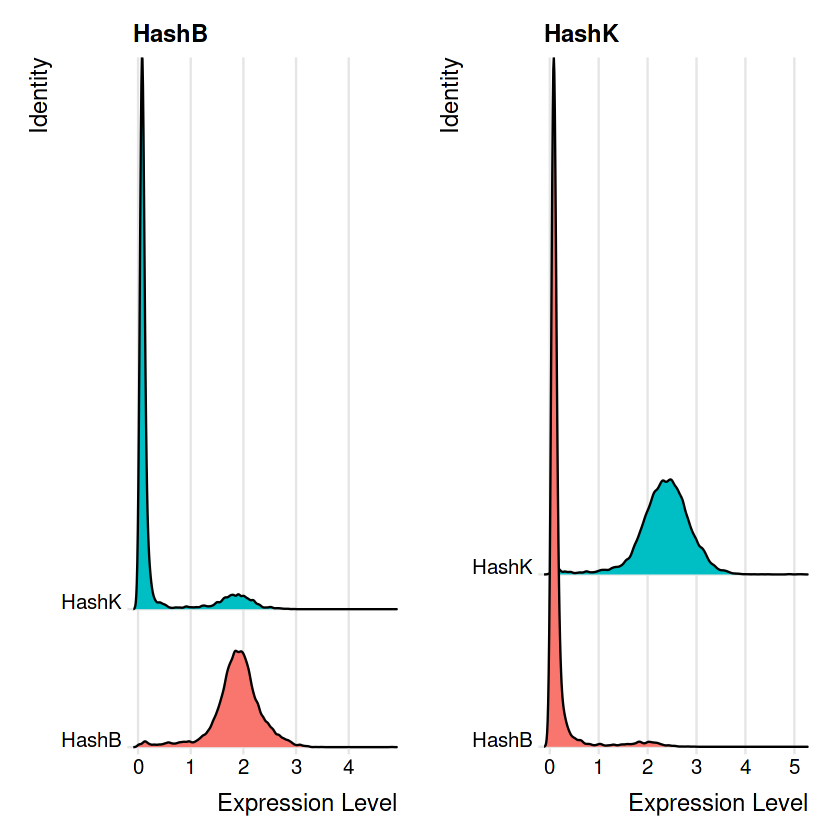

In [46]:
Idents(seu_1) <- "HTO_maxID"
RidgePlot(seu_1, assay = "HTO", 
          features = rownames(seu_1[["HTO"]])[1:2],
          ncol = 2)

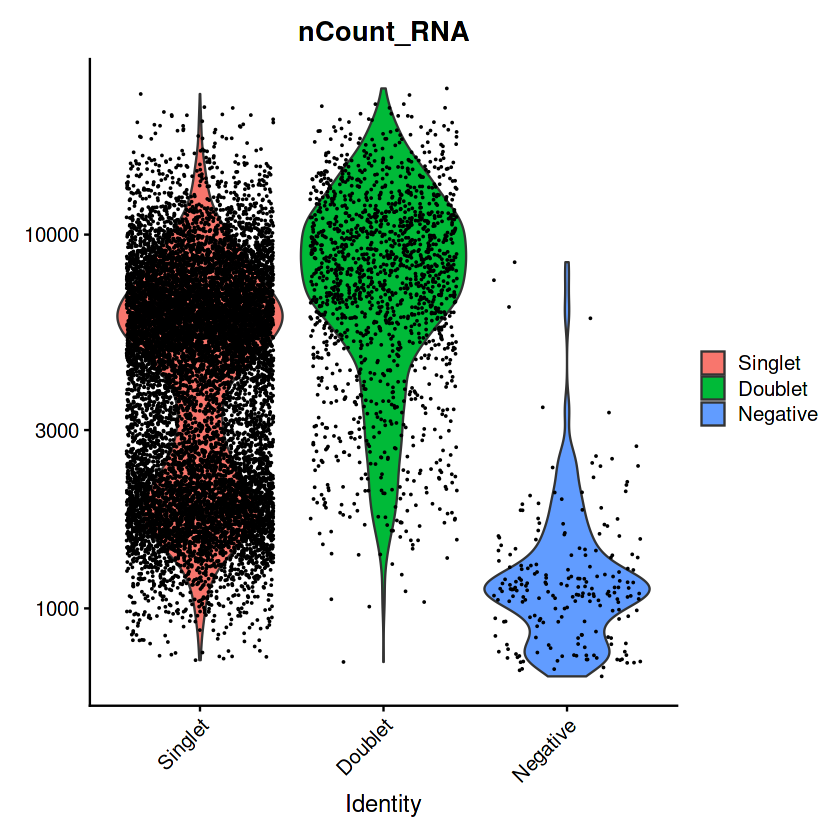

In [47]:
Idents(seu_1) <- "HTO_classification.global"
VlnPlot(seu_1, features = "nCount_RNA", 
        pt.size = 0.01, log = TRUE)

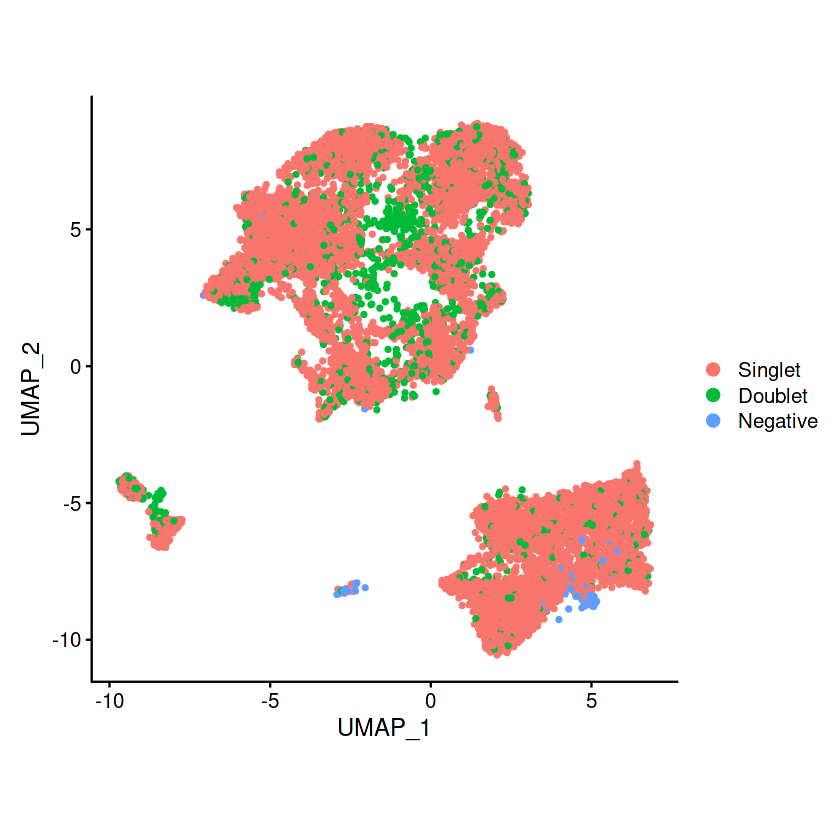

In [48]:
DimPlot(object = seu_1, reduction = 'umap',label = F, 
        pt.size = 1,label.size = 6, repel = T
       ) + theme(aspect.ratio=1)

In [49]:
seu_sub <- subset(seu_1, idents = "Singlet")
seu_sub

An object of class Seurat 
36809 features across 11981 samples within 3 assays 
Active assay: CITE (206 features, 0 variable features)
 2 other assays present: RNA, HTO
 2 dimensional reductions calculated: pca, umap

In [50]:
Idents(seu_sub) <- "HTO_maxID"

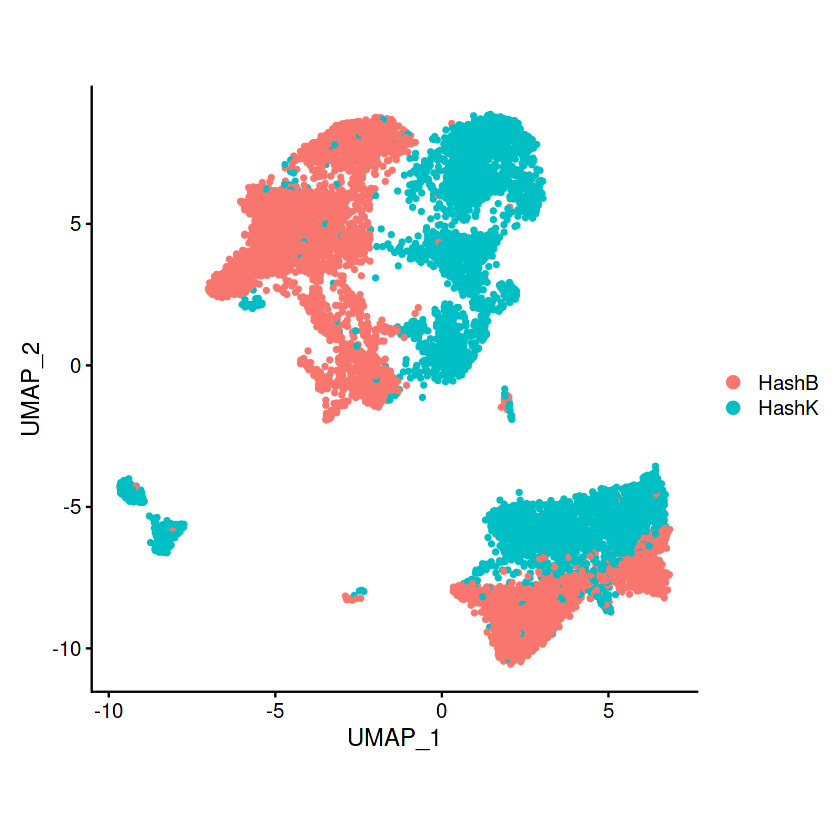

In [51]:
DimPlot(object = seu_sub, reduction = 'umap',label = F, 
        pt.size = 1,label.size = 6, repel = T
       ) + theme(aspect.ratio=1)

In [52]:
seu_K <- subset(seu_sub, idents = "HashK")
seu_B <- subset(seu_sub, idents = "HashB")

In [53]:
seu_K

An object of class Seurat 
36809 features across 5491 samples within 3 assays 
Active assay: CITE (206 features, 0 variable features)
 2 other assays present: RNA, HTO
 2 dimensional reductions calculated: pca, umap

In [54]:
seu_B

An object of class Seurat 
36809 features across 6490 samples within 3 assays 
Active assay: CITE (206 features, 0 variable features)
 2 other assays present: RNA, HTO
 2 dimensional reductions calculated: pca, umap

In [55]:
save_path_K = file.path(save_dir, paste0(samples_ID, "K.rds"))
save_path_B = file.path(save_dir, paste0(samples_ID, "B.rds"))

In [56]:
saveRDS(seu_K, save_path_K)
saveRDS(seu_B, save_path_B)